In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
data = pd.read_csv('scatter_data.csv')

In [41]:
data.head()

,% x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475


In [42]:
print(data.columns)

Index(['% x', ' y '], dtype='object')


In [43]:
x_axis = data['% x']
y_axis = data[' y ']

In [44]:
print(x_axis)

0     95.954341
1     60.162754
2     52.754898
3     88.034798
4     80.271275
        ...    
95    60.430557
96    56.943862
97    93.616283
98    91.772335
99    99.863385
Name: % x, Length: 100, dtype: float64


In [45]:
print(y_axis)

0     328.375777
1     259.053445
2     207.792989
3     333.209632
4     290.042475
         ...    
95    271.013639
96    226.411831
97    275.939404
98    337.474381
99    335.755833
Name:  y , Length: 100, dtype: float64


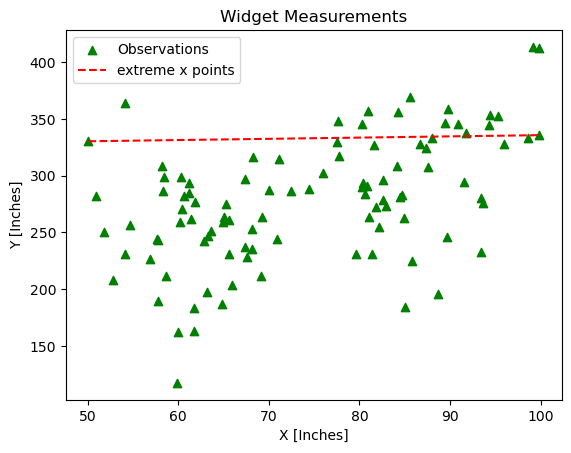

In [46]:
plt.scatter(x_axis, y_axis, marker='^', color='green', label='Observations')
plt.plot([min(x_axis), max(x_axis)], [y_axis[x_axis.idxmin()], y_axis[x_axis.idxmax()]], 'r--', label='extreme x points')
plt.title('Widget Measurements')
plt.xlabel('X [Inches]')
plt.ylabel('Y [Inches]')
plt.legend()
plt.show()

In [47]:
data = pd.read_csv('student_grades.csv')
data.head()

,% studentID,avgScore
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249


In [48]:
print(data.columns)

Index(['% studentID', ' avgScore '], dtype='object')


In [49]:
score = data[' avgScore ']
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

In [50]:
counts = [len([score for score in score if score >= bins[i] and score < bins[i+1]]) for i in range(len(bins) - 1)] 

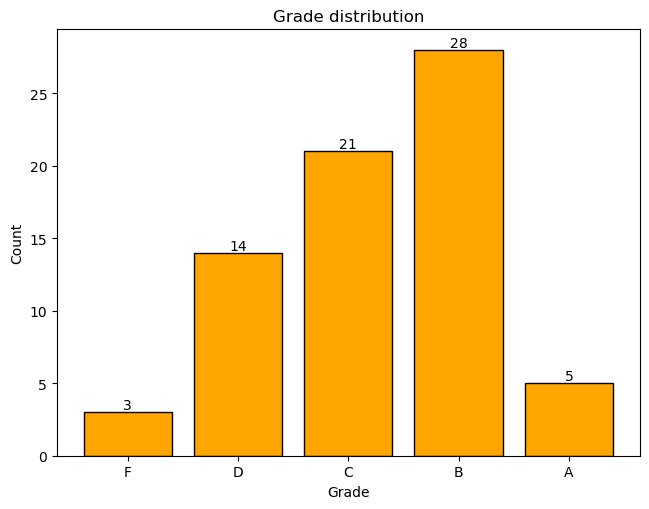

In [51]:
plt.bar(np.arange(len(labels)), counts, color='orange', edgecolor='black')
plt.tight_layout()
plt.xticks(np.arange(len(labels)),labels)
for i,j in enumerate(counts):
    plt.text(i, j, str(j),fontsize=10,verticalalignment='bottom',color='black',ha='center')
plt.title('Grade distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

C:\Users\nswar\AppData\Local\Temp\ipykernel_23576\503149082.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot_axis.set_xticklabels(heuristic_techniques)


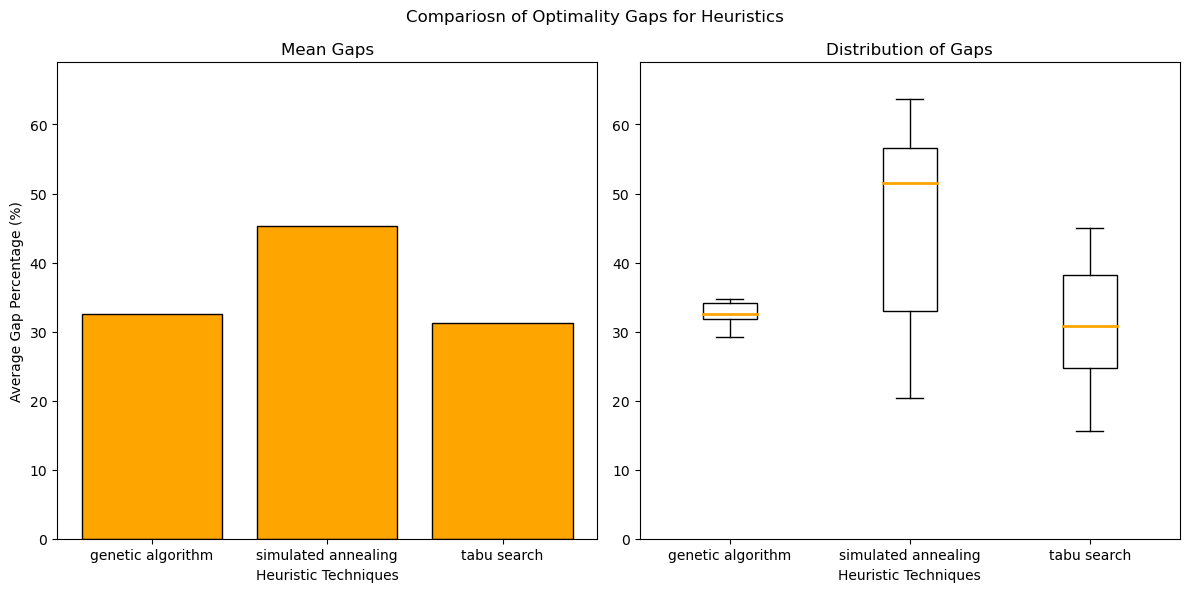

In [52]:
import matplotlib.pyplot as plt
import pandas as pd


optimization_results = pd.read_csv("C:/Users/nswar/PFA_HW4/solution_data.csv")

cleaned_results = optimization_results[~optimization_results['% Problem'].astype(str).str.startswith('%')]
heuristic_techniques = ["genetic algorithm", "simulated annealing", "tabu search"]

benchmark_values = cleaned_results.groupby("% Problem")["Value"].max().reset_index()
benchmark_values.rename(columns={'Value': 'Benchmark_Value'}, inplace=True)

results_with_benchmarks = cleaned_results.merge(benchmark_values, on='% Problem', how='left')

results_with_benchmarks["Gap_Percentage"] = (
    (results_with_benchmarks["Benchmark_Value"] - results_with_benchmarks["Value"]) / 
    results_with_benchmarks["Benchmark_Value"]) * 100

heuristic_comparison = results_with_benchmarks[results_with_benchmarks["SolnMethod"] != "optimal"]

heuristic_gap_data = heuristic_comparison.groupby('SolnMethod')['Gap_Percentage'].apply(list)
heuristic_gap_dictionary = heuristic_gap_data.to_dict()

gap_dataframe = pd.DataFrame(heuristic_gap_dictionary)

figure, (bar_plot_axis, box_plot_axis) = plt.subplots(1, 2, figsize=(12, 6))

mean_gaps = heuristic_comparison.groupby("SolnMethod")["Gap_Percentage"].mean()
bar_plot_axis.bar(heuristic_techniques, mean_gaps, color='orange', edgecolor='black')
bar_plot_axis.set_xticklabels(heuristic_techniques)
bar_plot_axis.set_ylabel('Average Gap Percentage (%)')
bar_plot_axis.set_xlabel('Heuristic Techniques')
bar_plot_axis.set_title('Mean Gaps')
bar_plot_axis.set_ylim(0, 69)

gap_spread_plot = box_plot_axis.boxplot(gap_dataframe, patch_artist=True, labels=heuristic_techniques)
box_plot_axis.set_title('Distribution of Gaps')
box_plot_axis.set_xlabel('Heuristic Techniques')
box_plot_axis.set_ylim(0, 69)

uniform_ylim = max(bar_plot_axis.get_ylim()[1], box_plot_axis.get_ylim()[1])
bar_plot_axis.set_ylim(0, uniform_ylim)
box_plot_axis.set_ylim(0, uniform_ylim)

for median in gap_spread_plot['medians']:
    median.set(color='orange', linewidth=2)
for box in gap_spread_plot['boxes']:
    box.set_facecolor('white')

figure.suptitle('Compariosn of Optimality Gaps for Heuristics', fontsize=12)

plt.tight_layout()

plt.show()

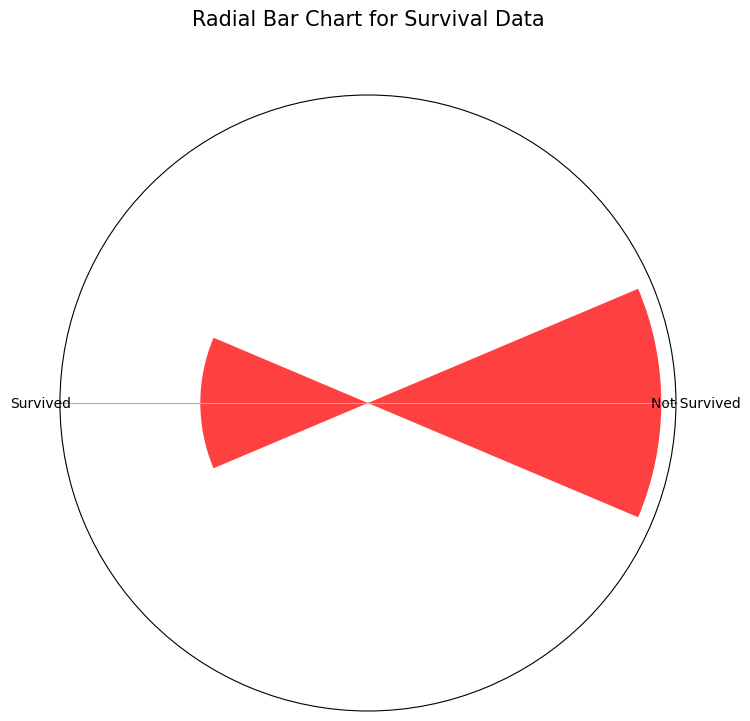

In [53]:
import numpy as np
data=pd.read_csv("C:/Users/nswar/PFA_HW4/gender_submission.csv")
survival_counts = data['Survived'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})


num_vars = len(survival_counts)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values = survival_counts.values.tolist()
values += values[:1]
angles += angles[:1]

ax.fill(angles, values, color='red', alpha=0.25)

bars = ax.bar(angles[:-1], values[:-1], color='red', alpha=0.75)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Not Survived', 'Survived'])

ax.set_yticks([])

plt.title('Radial Bar Chart for Survival Data', y=1.1, fontsize=15)

plt.show()

1. *Setup for Polar Coordinates*:
   python
   fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
   
   This initializes a Matplotlib figure and a subplot. The subplot_kw argument specifies that the subplot should use a polar projection, which means we're setting up a coordinate system for circular plotting.

2. *Calculating the Angles*:
   python
   angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
   
   The np.linspace function generates num_vars evenly spaced values between 0 and \(2\pi\) (the full circle in radians). These values represent the angles at which the bars will be plotted. endpoint=False means that the stop value (\(2\pi\)) is not included.

3. *Preparing Data for Plotting*:
   python
   values = survival_counts.values.tolist()
   values += values[:1]
   angles += angles[:1]
   
   - values are the counts of each survival category converted to a list.
   - We then append the first value of values to the end of the list to close the loop when plotting.
   - We do the same for angles to ensure that the plot is a complete circle.

4. *Creating the Filled Area*:
   python
   ax.fill(angles, values, color='red', alpha=0.25)
   
   The fill function creates a filled area plot on the polar coordinates. The angles are used as the x-values (though in a circular plot, these represent the angle), and values are the y-values (radii). The fill color is set to red with some transparency (alpha=0.25).

5. *Drawing the Radial Bars*:
   python
   bars = ax.bar(angles[:-1], values[:-1], color='red', alpha=0.75)
   
   - The bar function is used to draw the radial bars on the polar plot. 
   - We use angles[:-1] and values[:-1] to exclude the duplicated last value that was used to close the loop.
   - The bars are also colored red but with less transparency (alpha=0.75) to make them stand out.

6. *Setting Category Labels*:
   python
   ax.set_xticks(angles[:-1])
   ax.set_xticklabels(['Not Survived', 'Survived'])
   
   - set_xticks is used to place ticks at the specified angles.
   - set_xticklabels assigns labels to these ticks. Although we're working in a polar coordinate system, x-ticks represent the angular positions around the circle.

7. *Styling the Chart*:
   - ax.set_yticks([]): This line removes the radial ticks (which would normally represent concentric circles in the plot).
   - The title is set above the chart, with an adjustment to its vertical position (y=1.1) for better appearance.

8. *Displaying the Chart*:
   python
   plt.show()
   
   This command renders the figure in the output.

The resulting radial bar chart effectively displays the two categories in a circular fashion, offering a more creative and engaging way to present the data compared to traditional bar or pie charts.
data link:https://www.kaggle.com/competitions/titanic/data